In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("..")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.available
plt.style.use('seaborn-whitegrid')
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    plt.rc("font", family="Times New Roman")
set_style()

pd.set_option('display.max_rows', 500)
relativePathImages = '../latex/src/images/'

/home/dami/tesis/venv/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


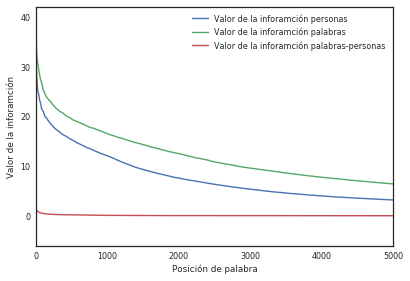

In [2]:
df = pd.read_csv('ivalue_entropia_personas_palabras.csv',index_col=0)
df2 = df.sort_values(by="information_value_personas", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas.plot(xlim=[0,5000])
df2 = df.sort_values(by="information_value_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_palabras.plot(xlim=[0,5000])

df2 = df.sort_values(by="information_value_personas_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas_palabras.plot(xlim=[0,5000])
ax2.legend([u'Valor de la inforamción personas',u'Valor de la inforamción palabras',u'Valor de la inforamción palabras-personas'])


ax2.set_xlabel(u'Posición de palabra')
ax2.set_ylabel(u'Valor de la inforamción')

ax= ax2.get_figure()
ax.savefig("ivalues.svg",dpi=300)

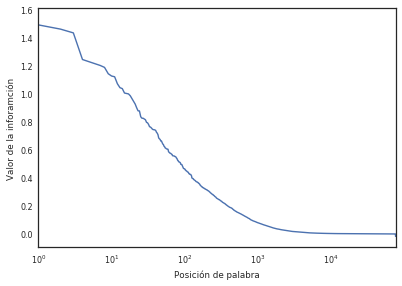

In [3]:
df2 = df.sort_values(by="information_value_personas_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas_palabras.plot(logx=True)
ax2.set_xlabel(u'Posición de palabra')
ax2.set_ylabel(u'Valor de la inforamción')
ax= ax2.get_figure()
ax.savefig("{0}ivaluesLog.pdf".format(relativePathImages),dpi=300)

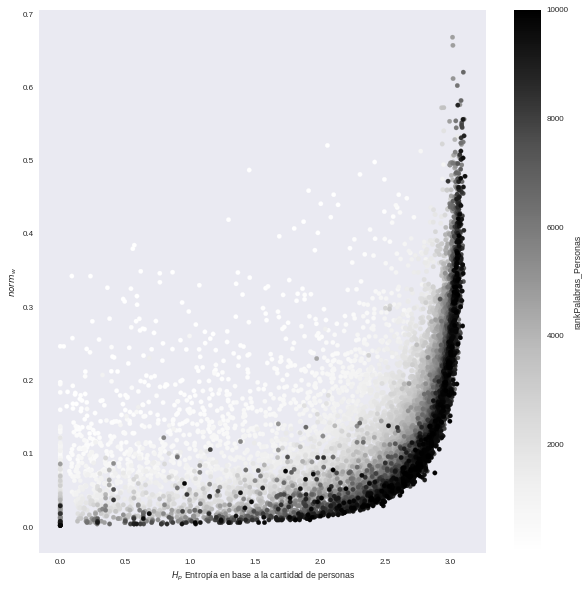

In [4]:
sns.set_style("dark")
ax = df.iloc[:10000].plot.scatter(x='entropy_personas',y='normCantPalabras',c='rankPalabras_Personas',sharex=False,figsize=(10,10))
ax.set_ylabel(u'$norm_w$')
ax.set_xlabel(u'$H_p$ Entropía en base a la cantidad de personas')

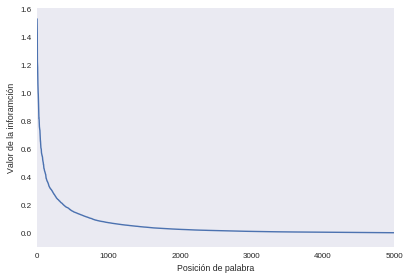

In [5]:
df2 = df.sort_values(by="information_value_personas_palabras", ascending=False)
df2 = df2.reset_index()
ax2 = df2.information_value_personas_palabras.plot(xlim=[0,5000])


ax2.set_xlabel(u'Posición de palabra')
ax2.set_ylabel(u'Valor de la inforamción')

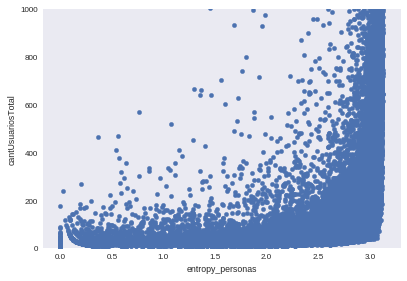

In [6]:
df.plot.scatter(x="entropy_personas", y="cantUsuariosTotal", ylim=[0, 1000])

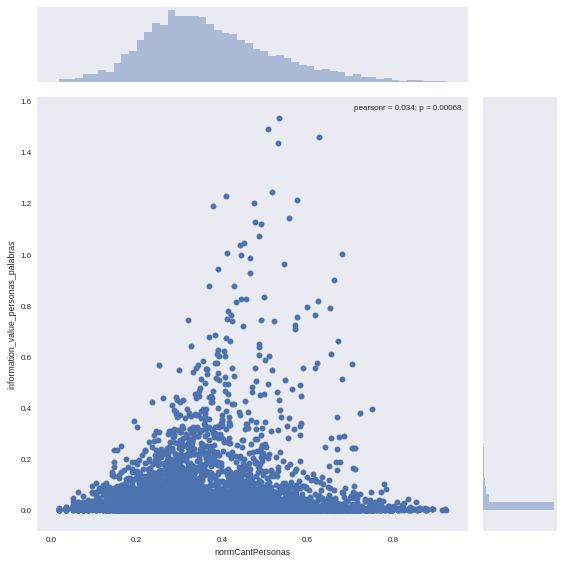

In [7]:
sns.set_style(style='dark')
sns.jointplot(kind='scatter',x="normCantPersonas", y="information_value_personas_palabras",data=df.iloc[:10000],size=8)

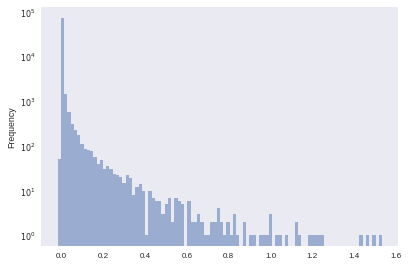

In [8]:
df.information_value_personas_palabras.plot(kind='hist',bins=100,logy=True,alpha=0.5)

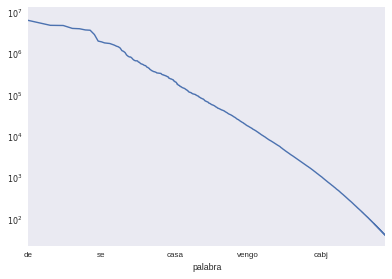

In [9]:
ax = df.cantPalabra.sort_values(ascending=False).plot(y='cantPalabra',x=range(len(df.cantPalabra)),logy=True,logx=True)
ax.set_xlabel= range(len(df.cantPalabra))


In [10]:
df['Rank'] = df['cantPalabra'].rank(method = 'min', ascending = False)
x = range(len(df.cantPalabra))
x = np.log(df['Rank'])
y = np.log(df['cantPalabra'])
fit = np.polyfit(x, y, deg = 1)
fitted = fit[0] * x + fit[1]
print 'Valor estimado de s:\n{0}'.format(fit[0])

Valor estimado de s:
-1.45242883879


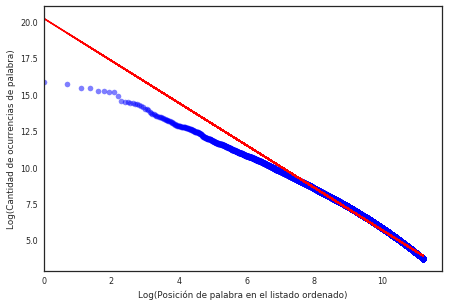

In [133]:
set_style()
fig = plt.Figure(figsize = (4*1.68,4), facecolor = 'w', edgecolor = 'w')
ax = plt.subplot(111)

ax.plot(x, y, 'bo', alpha = 0.5)
ax.plot(x,fitted,'r')

ax.set_xlabel(u'Log(Posición de palabra en el listado ordenado)')
ax.set_ylabel(u'Log(Cantidad de ocurrencias de palabra)')

ax.set_xlim(left = max([min(np.log(df['Rank'])) * 0.95,0]))

ax.get_figure().savefig("{0}zipf.pdf".format(relativePathImages),dpi=300)
plt.tight_layout()
plt.show()


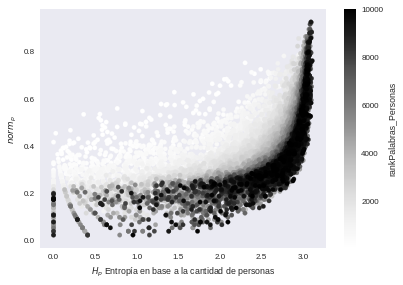

In [12]:
ax = df.iloc[:10000].plot(kind='scatter',x='entropy_personas',y='normCantPersonas',c='rankPalabras_Personas',sharex=False)
ax.set_xlabel(u'$H_p$ Entropía en base a la cantidad de personas')
ax.set_ylabel(r'$norm_p$')
ax2= ax.get_figure()
ax2.savefig("{0}entropiaPersonasxNormCantPersonas.pdf".format(relativePathImages),dpi=300)


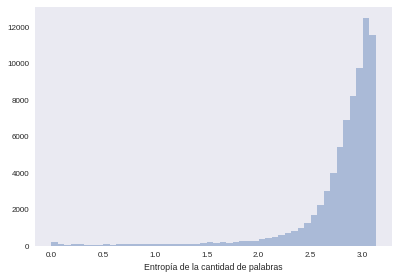

In [13]:
ax = sns.distplot(a=df.entropy_palabras,hist=True,kde=False,axlabel=u'Entropía de la cantidad de palabras')
ax2= ax.get_figure()
ax2.savefig("{0}DistribucionEntropia.pdf".format(relativePathImages),dpi=300)

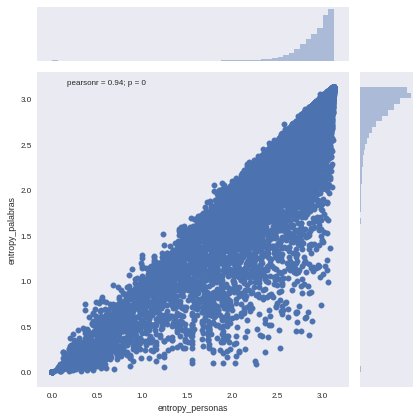

In [190]:
sns.set_style(style='dark')
sns.jointplot(y=df.entropy_palabras,x=df.entropy_personas)

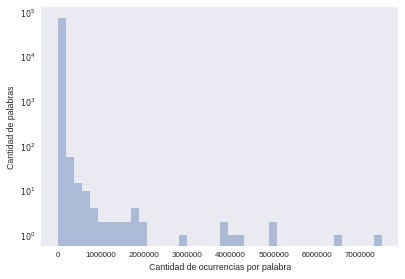

In [14]:
ax = sns.distplot(a=df.cantPalabra,hist=True,bins=40,kde=False)
ax.set_yscale('log')
ax.set_xlabel('Cantidad de ocurrencias por palabra')
ax.set_ylabel('Cantidad de palabras')
ax2 = ax.get_figure()
ax2.savefig("{0}DistribucionOcurrenciasPalabras.pdf".format(relativePathImages),dpi=300)

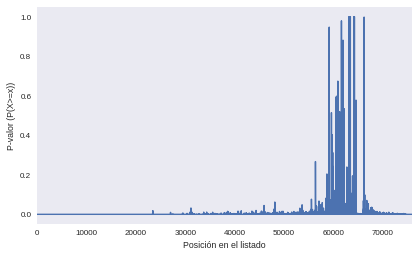

In [37]:
pvalores = pd.read_csv('../pvalores.csv')
f = pvalores.dropna().pvalor.plot(figsize=(4*1.68,4))
f.set_xlabel(u'Posición en el listado')
f.set_ylabel(u'P-valor (P(X>=x))')

f.get_figure().savefig('pvalores.png')

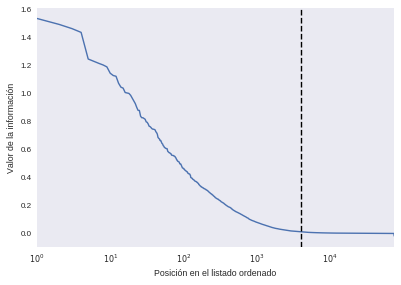

In [18]:
ax=df.plot(x='rankPalabras_Personas',y='information_value_personas_palabras',logx=True,legend=False)
ax.axvline(4000, linestyle='--', color='k')
ax.set_xlabel(u'Posición en el listado ordenado')
ax.set_ylabel(u'Valor de la información')
ax.get_figure().savefig("{0}valorInformacionCorte".format(relativePathImages),dpi=300)

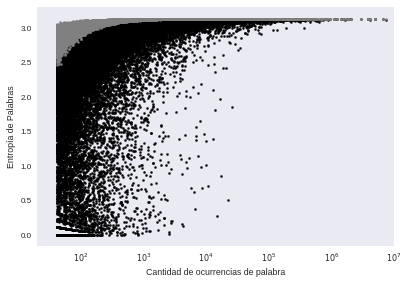

In [19]:

df2 = pd.DataFrame()
df2['x'] = df.cantPalabra
df2['y'] = df.entropy_palabras
ax = df2.plot(kind='scatter',x='x',y='y',s=5,color='black',logx=True,xlim=((20,10**7)))

df3 = pd.DataFrame()
df3['x'] = df.cantPalabra
df3['y'] = df.shuffled_entropy_palabras
df3.plot(kind='scatter',x='x',y='y',s=5,color='gray',logx=True,ax= ax)
ax.set_xlabel(u'Cantidad de ocurrencias de palabra')
ax.set_ylabel(u'Entropía de Palabras')



In [84]:
from apps import argentina
import csv
from nltk.tokenize import TweetTokenizer

provincias = argentina.keys()
frames = []
for p in provincias:
    dfT = pd.read_csv('../csv/train_{0}.csv'.format(p),encoding='utf-8',delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    frames.append(dfT)
arg = pd.concat(frames,keys = provincias,names=['provincias','nro'])
tknzr = TweetTokenizer(preserve_case=False,reduce_len=True, strip_handles=True)
arg['cantPalabras'] = arg.text.apply(lambda x: len([w for w in tknzr.tokenize(x.lower()) if w.isalpha()]))

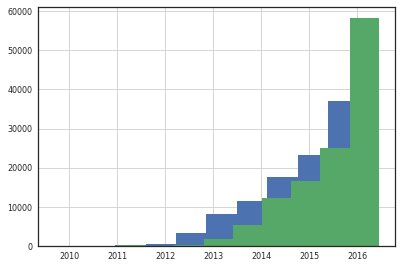

In [99]:
pd.to_datetime(arg.tweet_created_at).groupby(level=[0]).get_group('jujuy').hist()
pd.to_datetime(arg.tweet_created_at).groupby(level=[0]).get_group('chaco').hist()

In [145]:
arg.cantPalabras.sum(level='provincias')

provincias
jujuy              863858
catamarca          868067
sanjuan            821175
salta              848815
rionegro           887305
lapampa            975121
chaco              900358
mendoza            917016
buenosaires        846276
entrerios          929790
chubut             925388
santacruz          778866
neuquen            841710
misiones           922726
corrientes         847631
formosa            916682
santafe           1000775
santiago           870314
cordoba            963834
larioja            882883
tierradelfuego     933167
tucuman            852265
sanluis            907228
Name: cantPalabras, dtype: int64

### Veo cuantas palabras hay por usuario

In [160]:
arg.loc[['jujuy','chaco']].groupby('user_id').cantPalabras.sum().mean()

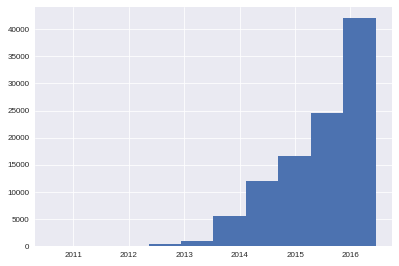

In [121]:
def histogramaCreacionUsuarios(df):
    pd.to_datetime(df.drop_duplicates(subset='user_id').created_at).hist()

def histogramaPublicacionTweets(df):
    pd.to_datetime(df.tweet_created_at).hist()

    
# histogramaUsuarios(dfT)
histogramaPublicacionTweets(dfT)


In [ ]:
ax = times.lapampa.hist(bins=100,alpha=0.5,color='red',label = 'La Pampa',stacked=True)
times.cordoba.hist(bins=100,ax=ax,color='green',alpha=0.5,label='Buenos Aires',stacked=True)
# times.tierradelfuego.hist(bins=100,ax=ax,color='blue',alpha=0.3,label='Cordoba',stacked=True)
ax.legend()
ax.get_figure().savefig("{0}histTweetsProvincia1.pdf".format(relativePathImages),dpi=300)


In [ ]:
ax = times.chaco.hist(bins=100,alpha=0.5,color='red',label = 'Chaco')
times.neuquen.hist(bins=100,ax=ax,color='green',alpha=0.5,label=u'Neuquén')
# times.tierradelfuego.hist(bins=100,ax=ax,color='blue',alpha=0.3,label='Cordoba',stacked=True)
ax.legend()
ax.get_figure().savefig("{0}histTweetsProvincia2.pdf".format(relativePathImages),dpi=300)


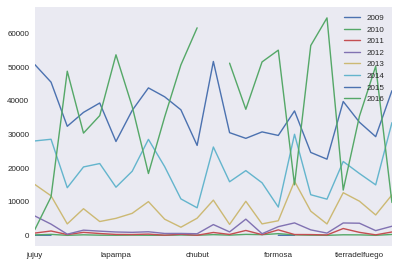

In [126]:
times2 = pd.DataFrame()
for p in provincias:
    times2[p] = times[p].groupby(times[p].dt.year).count()

ax = times2.T.plot(kind='line')
ax.set_label([2010,2016])
ax.legend()

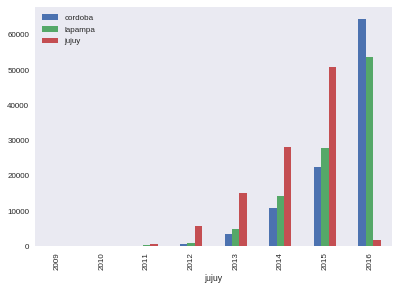

In [124]:
times2[['cordoba','lapampa','jujuy']].plot.bar()

In [ ]:
sns.set_context('paper')
fig, axes = plt.subplots(ncols=2,nrows=2,sharey=True)
sns.distplot(df.cantUsuariosTotal,kde=False,ax=axes[0,0])
sns.distplot(df.normCantPersonas,kde=False,ax=axes[0,1])
sns.distplot(a=df.cantPalabra,kde=False,ax=axes[1,0])
sns.distplot(df.normCantPalabras,kde=False,ax=axes[1,1])
fig.subplots_adjust(hspace=.4)
# axes[0,0].set(xlabel='Cantidad de ocurrencias', ylabel='')
replacements = {'cantUsuariosTotal': 'Cantidad de usuarios total', 'normCantPersonas': r'$norm_p$',
                'cantPalabra': 'Cantidad de ocurrencias de Palabra', 'normCantPalabras': r'$norm_w$'}

# axes[0,0].set_xlim(0,4000)
# axes[1,0].set_xlim(0,200000)
axes[0,0].set_yscale('log')

axes[1,0].set_yscale('log')

for i in range(2):
    for j in range(2):
        xlabel = axes[i][j].get_xlabel()
        ylabel = axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            axes[i][j].set_ylabel(replacements[ylabel])
fig.savefig("{0}cantNorms.pdf".format(relativePathImages),dpi=300)